<a href="https://colab.research.google.com/github/nguyen3006-thao/python_final_assignment/blob/main/Covid_19_Stock_Chau_Thao_Namitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group: Chau Le, Namitha Paul, Thao Nguyen

*   https://github.com/nguyen3006-thao/python_final_assignment



In [ ]:
!pip install yfinance
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import yfinance as yf              # a popular open source library to access the financial data available on Yahoo Finance
import matplotlib.pyplot as plt
import mplfinance as mpf           # a financial charting library of matplotlib

**STEPS:**
2.   Read the daily confirmed cases and deaths into two dataframes can be found at this github page:


> a)	Confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"




  > b)	deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"


3. Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level






In [ ]:
# URLs for confirmed cases and deaths data of COVID-19
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Read data into DataFrames
confirmed_cases = pd.read_csv(confirmed_cases_url)
deaths = pd.read_csv(deaths_url)

# Sum confirmed cases and deaths of global Covid-19 for each date
confirmed_cases = confirmed_cases.iloc[:,4:].sum()
confirmed_cases.name = 'Covid-19 confirmed cases'
deaths = deaths.iloc[:,4:].sum()
deaths.name = 'Covid-19 deaths'

# Use pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level
global_covid = pd.concat([confirmed_cases, deaths],axis=1)

# Convert index to datetime
global_covid.index = pd.to_datetime(global_covid.index)

# Name index column
global_covid.index.name = 'Date'

global_covid


,Covid-19 confirmed cases,Covid-19 deaths
Date,,
2020-01-22,557,17
2020-01-23,657,18
2020-01-24,944,26
2020-01-25,1437,42
2020-01-26,2120,56
...,...,...
2023-03-05,676024901,6877749
2023-03-06,676082941,6878115
2023-03-07,676213378,6879038


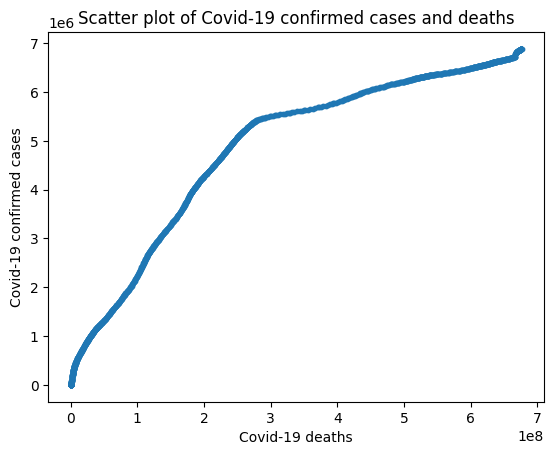

In [ ]:
#  Use scatter plot to show relationship between Covid-19 confirmed cases & deaths
plt.scatter(global_covid['Covid-19 confirmed cases'], global_covid['Covid-19 deaths'],s=10)
plt.title('Scatter plot of Covid-19 confirmed cases and deaths')
plt.xlabel('Covid-19 deaths')
plt.ylabel('Covid-19 confirmed cases')
plt.show()

In [ ]:
global_covid['Covid-19 confirmed cases'].corr(global_covid['Covid-19 deaths'])


0.9397632884933065

**Insight**: There is a strong positive correlation between Covid-19 confirmed cases and deaths.

**STEPS:**

4. Research a stock for each below that reflects the following industries (it will be used in the next step):

> a) Overall American Market

> b) Overall Canadian Market

> c) Travel sector

> d) The Real Estate sector

> e) Precious metals (Gold, Silver, Platinum, etc)

5. Use AlphaVantage (the stock API used earlier in the course) or other website to get the daily high and low prices for your selected stocks


In [ ]:
# Define the stocks and their corresponding symbols
# add 1 more stock for tsx index
stocks = {
          'S&P/TSX Composite index' : '^GSPTSE',    # representing roughly 70% of the total market capitalization on the Toronto Stock Exchange
          'Pfizer' : 'PFE',                         # an American multinational pharmaceutical corporation that developed the Covid-19 vaccine
          'Canadian Tire': 'CTC.TO',                # Canadian Tire, a stock of Canada Market, Toronto Stock Exchange
          'Air Canada': 'AC.TO',                    # Air Canada, Toronto Stock Exchange - Travel sector
          'Choice Properties REIT': 'CHP-UN.TO',    # Choice Properties REIT, Toronto Stock Exchange - The Real Estate sector
          'SPDR Gold Trust ETF': 'GLD'              # SPDR Gold Trust ETF - Precious metals
          }

# Define the date range (from start_date to the date before end_date)
start_date = '2020-02-01'
end_date = '2021-07-01'

# Create an empty DataFrame to store the data
stock_data = pd.DataFrame()

# Loop through the stocks
for stock_name, symbol in stocks.items():
    # Fetch historical stock data using yfinance
    data = yf.download(symbol, start=start_date, end=end_date)

    # Add 'Stock' and 'Symbol' columns
    data['Stock'] = stock_name
    data['Symbol'] = symbol


    # Append data to the DataFrame
    stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])

# Save the DataFrame to a CSV file
stock_data.to_csv('stock_data.csv', index=True)

stock_data

[*********************100%%**********************]  1 of 1 completed


<ipython-input-7-4eb81f69040f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-7-4eb81f69040f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-7-4eb81f69040f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-7-4eb81f69040f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-7-4eb81f69040f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


[*********************100%%**********************]  1 of 1 completed


<ipython-input-7-4eb81f69040f>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  stock_data = stock_data.append(data[['Stock', 'Symbol','High', 'Low', 'Open','Close']])


,Stock,Symbol,High,Low,Open,Close
Date,,,,,,
2020-02-03,S&P/TSX Composite index,^GSPTSE,17441.599609,17351.000000,17351.000000,17379.800781
2020-02-04,S&P/TSX Composite index,^GSPTSE,17548.800781,17493.800781,17504.599609,17512.699219
2020-02-05,S&P/TSX Composite index,^GSPTSE,17674.000000,17606.099609,17629.400391,17651.599609
2020-02-06,S&P/TSX Composite index,^GSPTSE,17758.500000,17670.599609,17686.099609,17757.500000
2020-02-07,S&P/TSX Composite index,^GSPTSE,17716.699219,17633.000000,17705.400391,17655.500000
...,...,...,...,...,...,...
2021-06-24,SPDR Gold Trust ETF,GLD,167.229996,166.009995,167.000000,166.039993
2021-06-25,SPDR Gold Trust ETF,GLD,167.529999,166.289993,167.449997,166.589996
2021-06-28,SPDR Gold Trust ETF,GLD,166.910004,166.360001,166.679993,166.580002


**STEPS:**

6. Append stock info to the global covid data frame created in step 3



In [ ]:
# Join stock_data & global_covid dataframe
stock_covid = stock_data.join(global_covid)

# Save to csv file
stock_covid.to_csv('stock_covid.csv',index=True)

stock_covid

,Stock,Symbol,High,Low,Open,Close,Covid-19 confirmed cases,Covid-19 deaths
Date,,,,,,,,
2020-02-03,S&P/TSX Composite index,^GSPTSE,17441.599609,17351.000000,17351.000000,17379.800781,19887,428
2020-02-03,Pfizer,PFE,36.091084,35.388992,35.540798,35.588234,19887,428
2020-02-03,Canadian Tire,CTC.TO,198.500000,198.500000,198.500000,198.500000,19887,428
2020-02-03,Air Canada,AC.TO,45.180000,44.119999,44.369999,44.779999,19887,428
2020-02-03,Choice Properties REIT,CHP-UN.TO,14.909366,14.702920,14.743202,14.853978,19887,428
...,...,...,...,...,...,...,...,...
2021-06-30,Pfizer,PFE,39.270000,38.820000,39.139999,39.160000,182712726,3976679
2021-06-30,Canadian Tire,CTC.TO,252.669998,252.669998,252.669998,252.669998,182712726,3976679
2021-06-30,Air Canada,AC.TO,25.830000,25.370001,25.830000,25.500000,182712726,3976679


In [ ]:
# check whether dataset have null value
stock_covid.isnull().sum()


Stock                       0
Symbol                      0
High                        0
Low                         0
Open                        0
Close                       0
Covid-19 confirmed cases    0
Covid-19 deaths             0
dtype: int64

**STEPS:**

7. Create an appropriate graph detailing your info - explain why you chose the graphs you did, use matplotlib



> 7.1. We use mplfinance, a financial charting library of matplotlib to create scandelstick chart for each stock. Candlestick charts are widely used in financial markets to represent the price movement of stocks, over the time. They provide a visual representation of open, high, low, and close prices for each date.



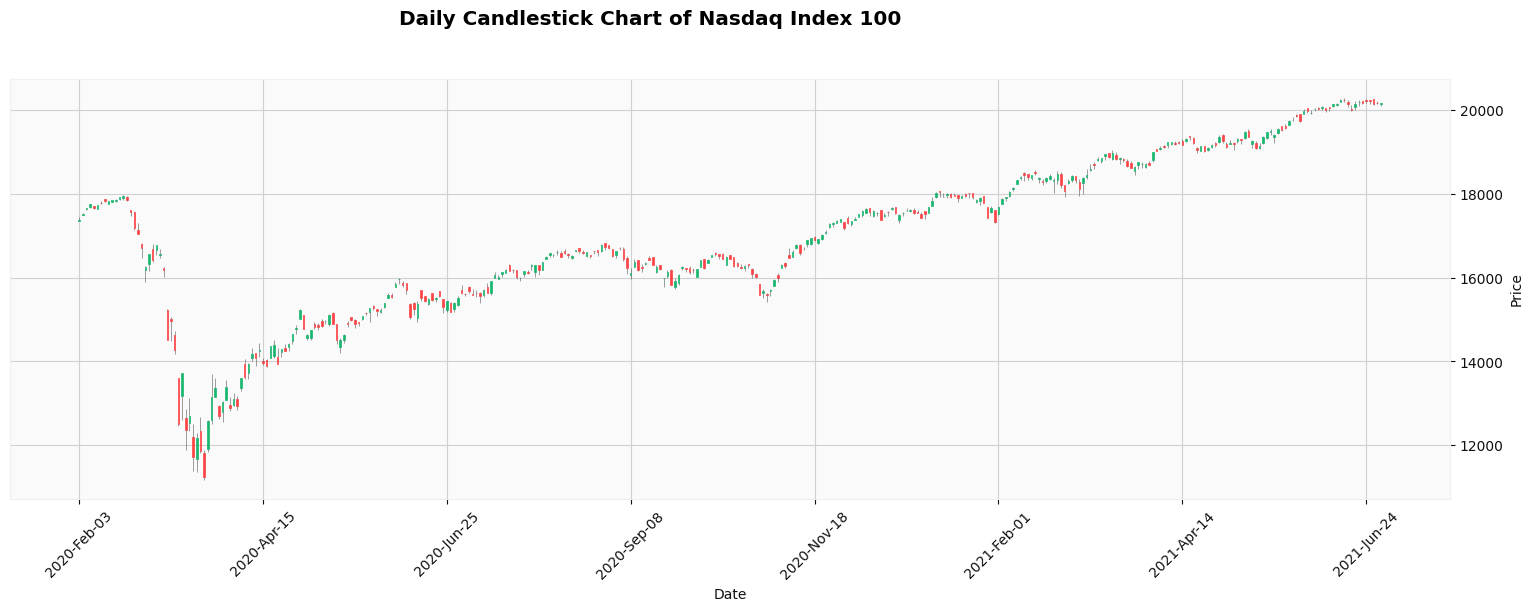

In [ ]:
# Get stock prices & Covid data for each stock symbol
TSX_Index = stock_covid[stock_covid['Symbol']=='^GSPTSE']
Pfizer = stock_covid[stock_covid['Symbol']=='PFE']
Canadian_Tire = stock_covid[stock_covid['Symbol']=='CTC.TO']
Air_Canada =  stock_covid[stock_covid['Symbol']=='AC.TO']
Choice_Properties = stock_covid[stock_covid['Symbol']=='CHP-UN.TO']
Gold = stock_covid[stock_covid['Symbol']=='GLD']

# Daily Candlestick chart of Pfizer
mpf.plot(TSX_Index[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of S&P/TSX Composite index', xlabel='Date',ylabel='Price',figsize=(20, 6))


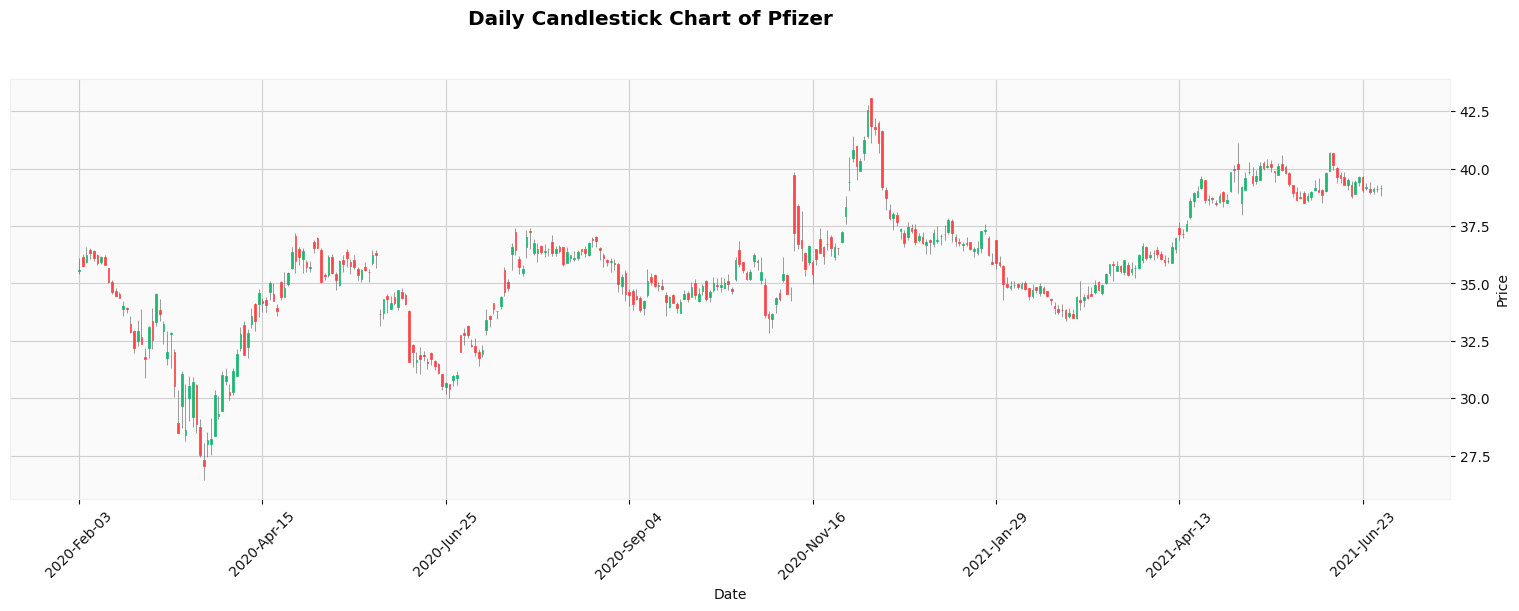

In [ ]:
# Daily Candlestick chart of Pfizer
mpf.plot(Pfizer[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Pfizer', xlabel='Date',ylabel='Price',figsize=(20, 6))

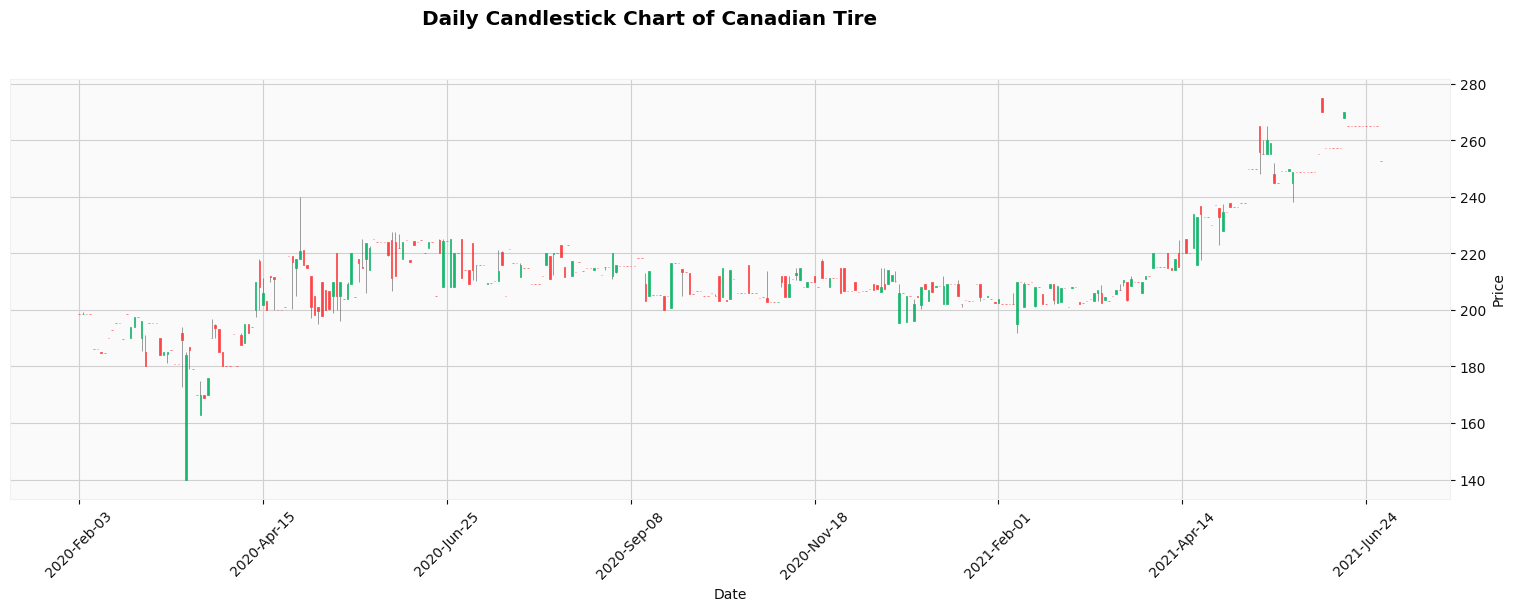

In [ ]:
# Daily Candlestick chart of Canadian Tire
mpf.plot(Canadian_Tire[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Canadian Tire', xlabel='Date',ylabel='Price',figsize=(20, 6))


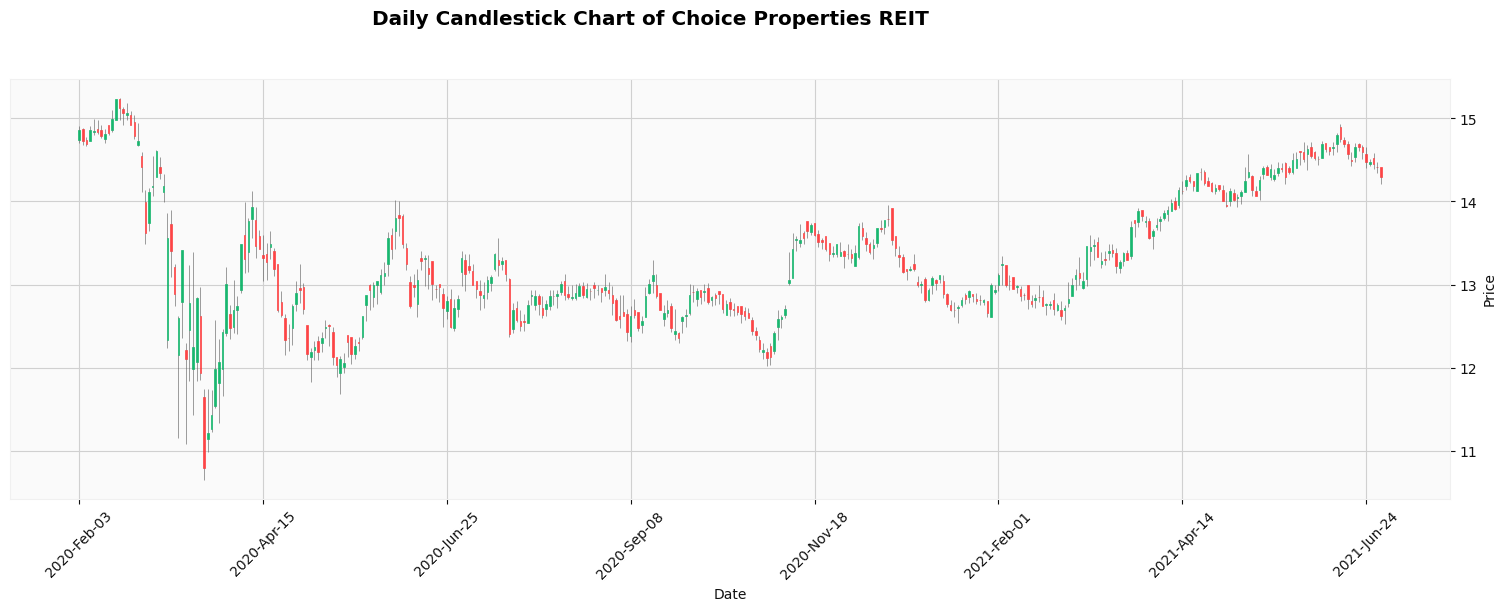

In [ ]:
# Daily Candlestick chart of Choice Properties REIT
mpf.plot(Choice_Properties[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Choice Properties REIT', xlabel='Date',ylabel='Price',figsize=(20, 6))

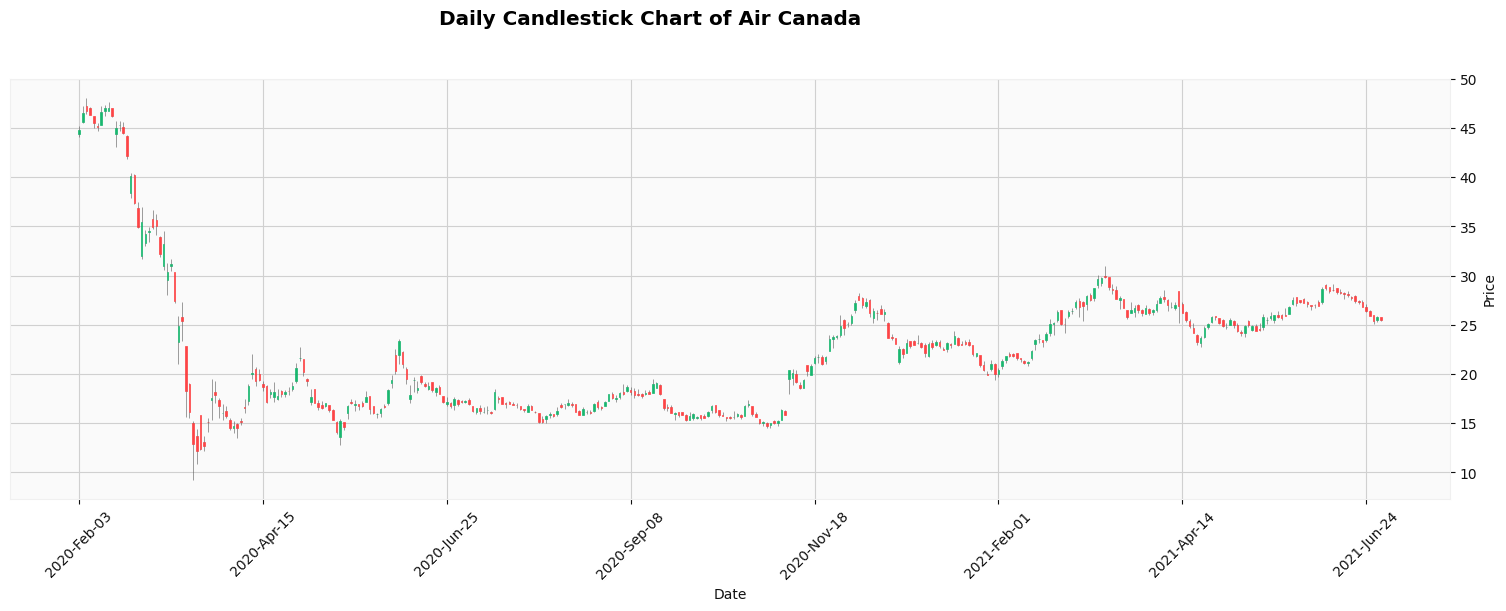

In [ ]:
# Daily Candlestick Chart of Air Canada
mpf.plot(Air_Canada[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of Air Canada', xlabel='Date',ylabel='Price',figsize=(20, 6))

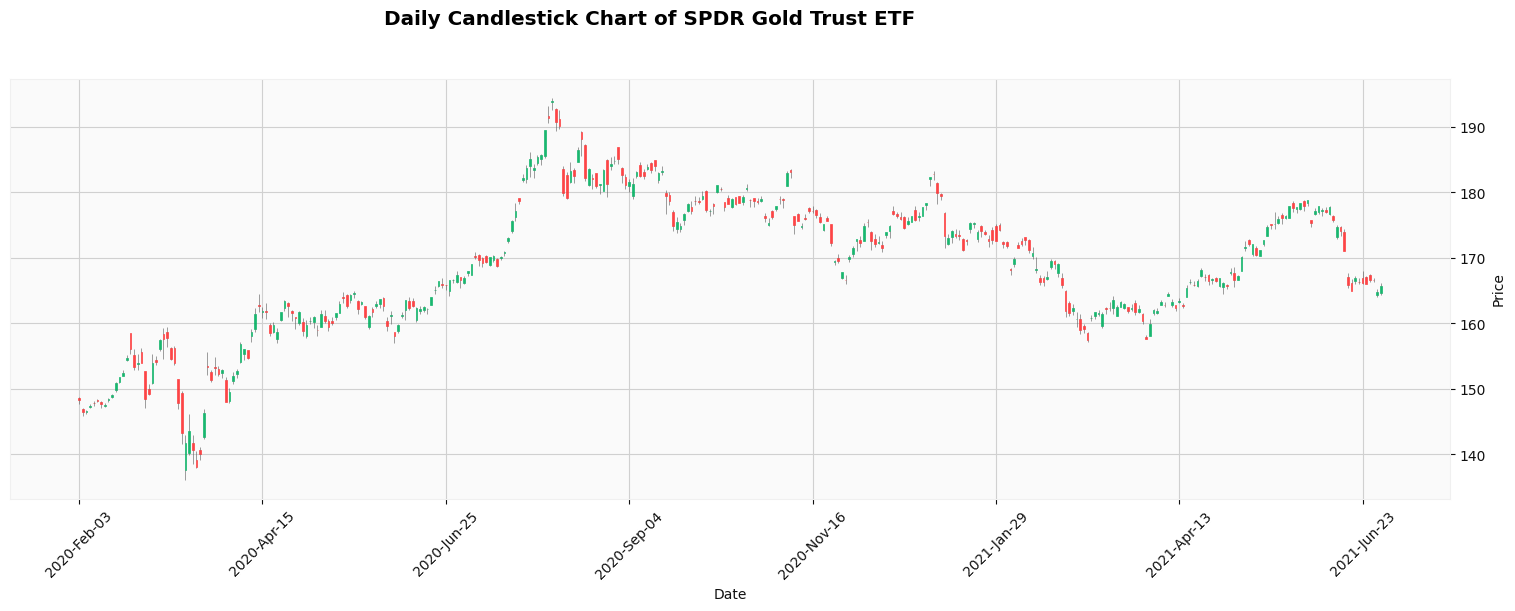

In [ ]:
# Daily Candlestick Chart of SPDR Gold Trust ETF
mpf.plot(Gold[['Open','High','Low','Close']],style = 'yahoo', type='candle', title='Daily Candlestick Chart of SPDR Gold Trust ETF', xlabel='Date',ylabel='Price',figsize=(20, 6))

7.2. We use dual y-axis line charts to show each stock's close price vs Covid-19 confirmed cases & deaths. They allows us present data in different unit to compare trends and potential relationships between stock price and confirmed cases & deaths during Covid period.


<ipython-input-16-2224279cee37>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


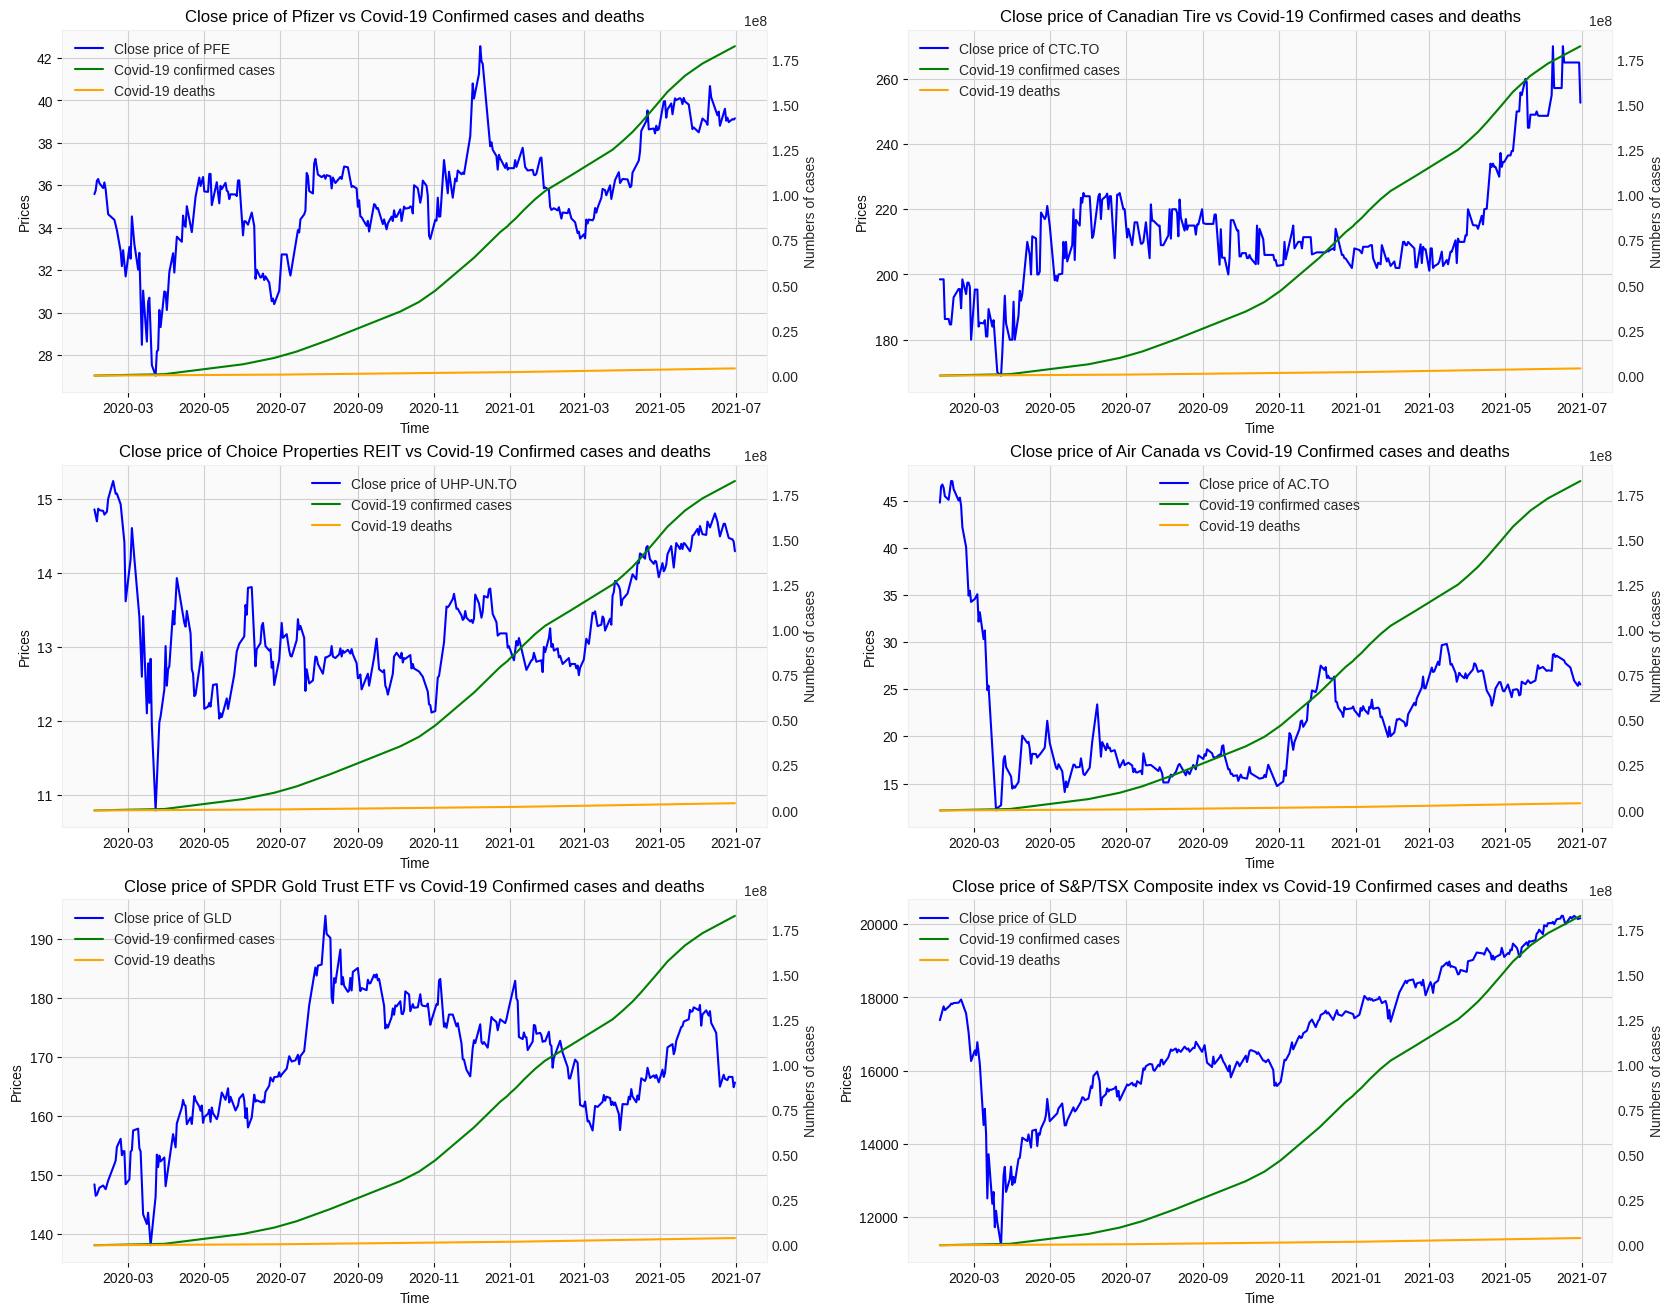

In [ ]:
# Creating multiple plots with 2 columns and 3 rows
fig, ax = plt.subplots(3,2,figsize=(20,16))
plt.style.use('seaborn-dark')

# Create dual y-axis line chart to show Pfizer's close price vs Covid-19 confirmed cases & deaths
ax0_0 = ax[0,0].twinx()

line1 = ax[0,0].plot(Pfizer['Close'], label = 'Close price of PFE', color = 'Blue')
line2 = ax0_0.plot(Pfizer['Covid-19 confirmed cases'],label='Covid-19 confirmed cases', color = 'Green')
line3 = ax0_0.plot(Pfizer['Covid-19 deaths'], label='Covid-19 deaths',color = 'Orange')

ax[0,0].set_title('Close price of Pfizer vs Covid-19 Confirmed cases and deaths')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Prices')
ax0_0.set_ylabel('Numbers of cases')
legend0_0= line1 + line2 + line3
label0_0 = [l.get_label() for l in legend0_0]
ax[0,0].legend(legend0_0, label0_0, loc=0)

# Create dual y-axis line chart to show Canadian Tire's close price vs Covid-19 confirmed cases & deaths
ax0_1 = ax[0,1].twinx()

line4 = ax[0,1].plot(Canadian_Tire['Close'], label = 'Close price of CTC.TO',color = 'Blue')
line5 = ax0_1.plot(Pfizer['Covid-19 confirmed cases'], label = 'Covid-19 confirmed cases', color = 'Green')
line6 = ax0_1.plot(Pfizer['Covid-19 deaths'], label = 'Covid-19 deaths', color = 'Orange')

ax[0,1].set_title('Close price of Canadian Tire vs Covid-19 Confirmed cases and deaths')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Prices')
ax0_1.set_ylabel('Numbers of cases')
legend0_1= line4 + line5 + line6
label0_1 = [l.get_label() for l in legend0_1]
ax[0,1].legend(legend0_1, label0_1, loc=0)


# Create dual y-axis line chart to show Choice Properties REIT's close price vs Covid-19 confirmed cases & deaths
ax1_0 = ax[1,0].twinx()

line7 = ax[1,0].plot(Choice_Properties['Close'],label = 'Close price of UHP-UN.TO', color = 'Blue')
line8 = ax1_0.plot(Pfizer['Covid-19 confirmed cases'], label = 'Covid-19 confirmed cases', color = 'Green' )
line9 = ax1_0.plot(Pfizer['Covid-19 deaths'], label = 'Covid-19 deaths', color = 'Orange')
ax[1,0].set_title('Close price of Choice Properties REIT vs Covid-19 Confirmed cases and deaths')
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Prices')
ax1_0.set_ylabel('Numbers of cases')
legend1_0= line7 + line8 + line9
label1_0 = [l.get_label() for l in legend1_0]
ax[1,0].legend(legend1_0, label1_0, loc='upper center')

# Create dual y-axis line chart to show Air Canada's close price vs Covid-19 confirmed cases & deaths
ax1_1 = ax[1,1].twinx()
line10 = ax[1,1].plot(Air_Canada['Close'], label = 'Close price of AC.TO', color = 'Blue')
line11 = ax1_1.plot(Pfizer['Covid-19 confirmed cases'], label = 'Covid-19 confirmed cases', color = 'Green')
line12 = ax1_1.plot(Pfizer['Covid-19 deaths'], label = 'Covid-19 deaths', color = 'Orange')
ax[1,1].set_title('Close price of Air Canada vs Covid-19 Confirmed cases and deaths')
ax[1,1].set_xlabel('Time')
ax[1,1].set_ylabel('Prices')
ax1_1.set_ylabel('Numbers of cases')
legend1_1= line10 + line11 + line12
label1_1 = [l.get_label() for l in legend1_1]
ax[1,1].legend(legend1_1, label1_1, loc='upper center')

# Create dual y-axis line chart to show SPDR Gold Trust ETF's close price vs Covid-19 confirmed cases & deaths
ax2_0 = ax[2,0].twinx()
line13 = ax[2,0].plot(Gold['Close'], label = 'Close price of GLD', color = 'Blue')
line14 = ax2_0.plot(Pfizer['Covid-19 confirmed cases'], label = 'Covid-19 confirmed cases', color = 'Green')
line15 = ax2_0.plot(Pfizer['Covid-19 deaths'], label = 'Covid-19 deaths', color = 'Orange' )
ax[2,0].set_title('Close price of SPDR Gold Trust ETF vs Covid-19 Confirmed cases and deaths')
ax[2,0].set_xlabel('Time')
ax[2,0].set_ylabel('Prices')
ax2_0.set_ylabel('Numbers of cases')
legend2_0= line13 + line14 + line15
label2_0 = [l.get_label() for l in legend2_0]
ax[2,0].legend(legend2_0, label2_0, loc='upper left')

# Create dual y-axis line chart to show S&P/TSX Composite index's close price vs Covid-19 confirmed cases & deaths
ax2_1 = ax[2,1].twinx()
line16 = ax[2,1].plot(TSX_Index['Close'], label = 'Close price of ^GSPTSE', color = 'Blue')
line17 = ax2_1.plot(Pfizer['Covid-19 confirmed cases'], label = 'Covid-19 confirmed cases', color = 'Green')
line18 = ax2_1.plot(Pfizer['Covid-19 deaths'], label = 'Covid-19 deaths', color = 'Orange' )
ax[2,1].set_title('Close price of S&P/TSX Composite index vs Covid-19 Confirmed cases and deaths')
ax[2,1].set_xlabel('Time')
ax[2,1].set_ylabel('Prices')
ax2_1.set_ylabel('Numbers of cases')
legend2_1= line16 + line17 + line18
label2_1 = [l.get_label() for l in legend2_1]
ax[2,1].legend(legend2_0, label2_0, loc='upper left')

plt.show()

**Insights**:

**Stage 1**:
*  During the first stage of Covid-19 pandemic from Feb 2020 to end of Mar 2020, stock market suddenly crashed after growing instability due to the COVID-19 pandemic. The spread of the COVID-19 virus led to widespread uncertainty about its impact on the global economy. Therefore all investors would like to withdraw their money out of the market. Investors's fear-based selling contributed to the sharp decline in all of 6 stock symbols.
*  In this stage, SPDR Gold Trust ETF decreased 13% from its highest price in Feb 2020, the least decrease of all 6 stock symbols, while Air Canada decreased the most (-74%). S&P/TSX Composite index representing roughly 70% of the total market capitalization on the Toronto Stock Exchange decreased around 37%.

**Stage 2:**
End of Mar 2020, G20 countries agreed to launch action plan to support the economy during COVID-19. Ongoing efforts to manage the pandemic included vaccination campaigns, adapting strategies based on emerging information and public health guidelines help people and societies adapted after the initial shock of the pandemic. Hence, most stocks experienced a V-shaped recovery pattern.


*   *S&P/TSX Composite index*: S&P/TSX Composite index represents roughly 70% of the total market capitalization on the Toronto Stock Exchange. Although numbers of Covid-19 cases and deaths continued increase, S&P/TSX Composite index experienced an significant and stadily increase from Mar 2020 to Jun 2021.

*   *Pfizer*:
  The news about promising results & FDA approval of Pfizer-BioNTech Covid-19 vaccine led to a surge in Pfizer's stock price, reaching a new high in Dec 2020. At the end of Jun 2021, Pfizer's stock price increased approximately 45% compared to each lowest price in Mar 2020.

*   *Canadian Tire*:
  Canadian Tire have recovered considerably since it bottomed out in March 2020. Although many Canadian Tire's stores closed at the first stage of Covid-19, the shift to e-commerce also benefit Canadian Tire. End of Jun 2021, Canadian Tire stock price increased nearly 50% compared to its lowest price in Mar 2020, increased around 27% compared to its price in early Feb 2020.

*   *Choice Properties REIT*:
  Choice Properties REIT is the largest real estate investment trust in Canada with many valued customers such as Costco, Walmart, Dollarama,... Although tenant collections reported worse than expected in Apr 2020, they increased steadily due to more business got back to business. End of Jun 2021, Choice Properties REIT stock price increased nearly 32% compared to its lowest price in Mar 2020 and nearly have the same price level of early Feb 2020.

*   *Air Canada*: The airline and travel industry faced many challenges during Covid-19 pandemic. Travel restrictions destroyed airline industry. COVID-19 border measures which ended as of October 1, 2022 help Air Canada stock price started a new uptrend from Nov 2020. However, travel demand was far from their pre-pandemic levels. Therefore, at the end of Jun 2021, Air Canada stock price was still less 43% than its price in early Feb 2020.

*   *SPDR Gold Trust ETF*: Investing in PDR Gold Trust ETF is a cost-efficient and easy way to gain exposure to gold. It is in such times of uncertainty like Covid-19 that gold is a “safe haven” for many investors. Lower return due to cutting interest rate, gold  was reliable store of value during Covid-19. After Mar 2020, SPDR Gold Trust ETF recovered quickly and surpassed its stock price level of early Feb 2020. Its stock price in Aug 2020 was nearly 1.3 times of it lowest price in Mar 2020. After experiencing a decrease between Aug 2020 and Apr 2021, SPDR Gold Trust ETF increased again and at the end of Jun, its stock price was still higher 17% compared to its lowest stock price in Mar 2020.










7.3. We use scatter plot to show the correlation between close price of S&P/TSX Composite index and Covid-19 confirmed cases.

In [ ]:
TSX_Index[TSX_Index['Close'] == TSX_Index['Close'].min()]

,Stock,Symbol,High,Low,Open,Close,Covid-19 confirmed cases,Covid-19 deaths,Date
Date,,,,,,,,,
2020-03-23,S&P/TSX Composite index,^GSPTSE,11870.599609,11172.700195,11802.799805,11228.5,381711,17523,2020-03-23


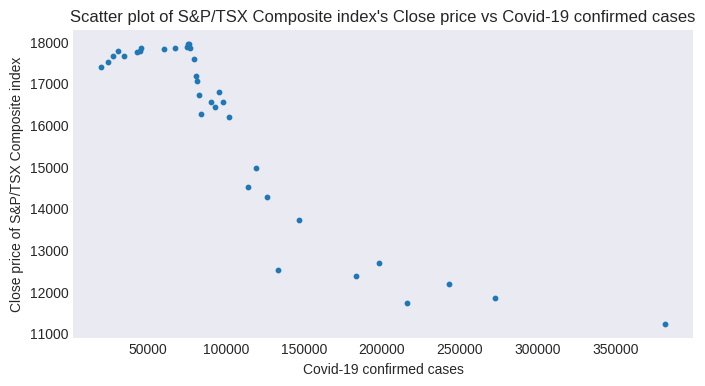

In [ ]:
# Reaction of S&P/TSX Composite index's price to Covid-19 is divided to 2 stages, before & after 2020-03-23
# Use scatter plot to explore relationship between S&P/TSX Composite index's Close price vs Covid-19 confirmed cases at the first stage of Covid-19 (before 2020-03023)
stage1 = TSX_Index[TSX_Index.index <= '2020-03-23']

plt.figure(figsize=(8,4))
plt.scatter(stage1['Covid-19 confirmed cases'], stage1['Close'],s=10)
plt.title('Scatter plot of S&P/TSX Composite index\'s Close price vs Covid-19 confirmed cases')
plt.xlabel('Covid-19 confirmed cases')
plt.ylabel('Close price of S&P/TSX Composite index')
plt.show()

In [ ]:
stage1['Close'].corr(stage1['Covid-19 confirmed cases'])

-0.8974576068504692

**Insight**: From Feb 2020 to the end of Mar 2020, there is a strong negative correlation between S&P/TSX Composite index and number of Covid-19 confirmed cases.

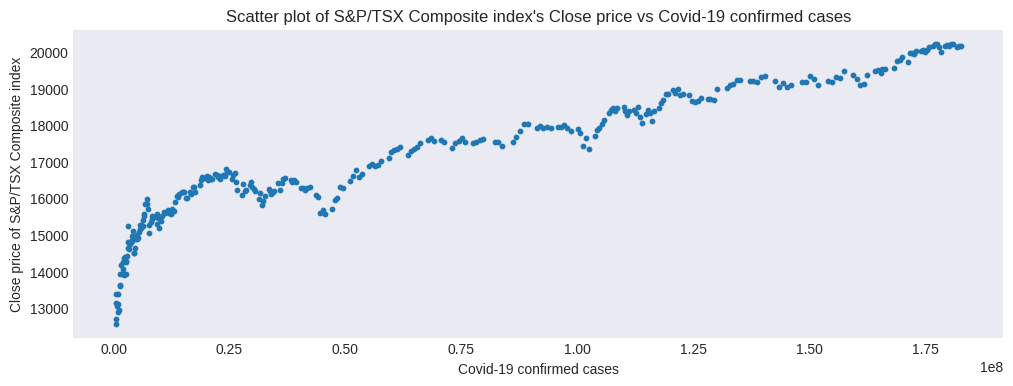

In [ ]:
# Use scatter plot to show relationship between S&P/TSX Composite index's Close price vs Covid-19 confirmed cases at stage 2 of Covid-19 (after end of Mar 2020)
stage2 = TSX_Index[TSX_Index.index > '2020-03-23']

plt.figure(figsize=(12,4))
plt.scatter(stage2['Covid-19 confirmed cases'], stage2['Close'],s=10)
plt.title('Scatter plot of S&P/TSX Composite index\'s Close price vs Covid-19 confirmed cases')
plt.xlabel('Covid-19 confirmed cases')
plt.ylabel('Close price of S&P/TSX Composite index')
plt.show()


In [ ]:
stage2['Close'].corr(stage2['Covid-19 confirmed cases'])

0.9500306253007833

**Insight**: From end of Mar 2020 to end of Jun 2021, there is a strong positive correlation between S&P/TSX Composite index and number of Covid-19 confirmed cases.